In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

## Performing API Calls

In [48]:
# Url for Weather Map API Calls
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

# Lists to store data
cities2 = []
api_calls = []
lat = []
temp = []
humidity = []
cloudiness = []
windspeed = []

# Making API calls to retrieve data, if the city isn't found, move onto the next
# Storing the information needed into the lists created above
for city in cities:
    try:
        response = requests.get(url + city)
        
        if response.status_code == 404:
            response.raise_for_status()
        else:
            weather_response = response.json()
            cities2.append(city)
            lat.append(weather_response["coord"]["lat"])
            temp.append(weather_response["main"]["temp"])
            humidity.append(weather_response["main"]["humidity"])
            cloudiness.append(weather_response["clouds"]["all"])
            windspeed.append(weather_response["wind"]["speed"])
            
    except requests.exceptions.HTTPError as e:
        continue



## Storing Data

In [6]:
# Creating a new DataFrame to store data retrieved through the Open Weather Map API calls
new_df = pd.DataFrame({"Cities":cities2,"Latitude":lat, "Temperature":temp, "Humidity":humidity, 
                       "Cloudiness":cloudiness,"Wind Speed":windspeed})

# Previewing the DataFrame
new_df.head()

In [55]:
# Saving the data to a CSV file
new_df.to_csv('output.csv')

## Creating a new DataFrame from the output file

In [39]:
# Using the output file's data to create a DataFrame
weather_df = pd.read_csv("output.csv")
weather_df = weather_df.drop(columns=["Unnamed: 0"])
weather_df.head()

,Cities,Cloudiness,Humidity,Latitude,Temperature,Wind Speed
0,bluff,0,22,-23.58,70.14,4.83
1,san quintin,75,94,17.54,82.40,9.17
2,fukue,75,70,35.03,87.80,4.70
3,rikitea,56,100,-23.12,73.65,14.45
4,tiznit,0,95,29.70,67.44,2.93


## City Latitude vs Temperature (F)

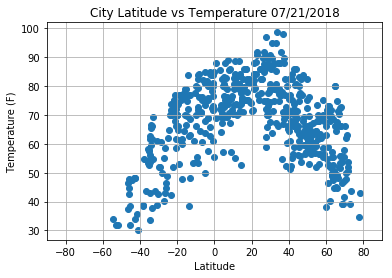

In [51]:
# Creating a scatter plot for city latitude vs temperature (F)
plt.scatter(weather_df["Latitude"], weather_df["Temperature"])
plt.title("City Latitude vs Temperature 07/21/2018")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90, 90)
plt.grid()
plt.savefig("lat_temp.png")

## City Latitude vs Humidity %

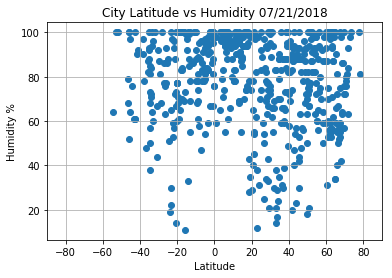

In [52]:
# Creating a scatter plot for city latitude vs humidity %
plt.scatter(weather_df["Latitude"], weather_df["Humidity"])
plt.title("City Latitude vs Humidity 07/21/2018")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.xlim(-90, 90)
plt.grid()
plt.savefig("lat_humid.png")

## City Latitude vs Cloudiness %

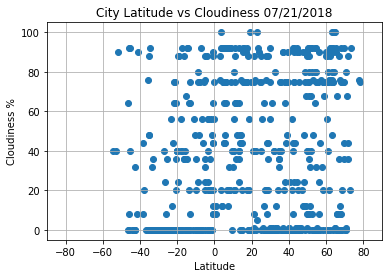

In [53]:
# Creating a scatter plot for city latitude vs cloudiness %
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"])
plt.title("City Latitude vs Cloudiness 07/21/2018")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.xlim(-90, 90)
plt.grid()
plt.savefig("lat_cloud.png")

## City Latitude vs Wind Speed (mph)

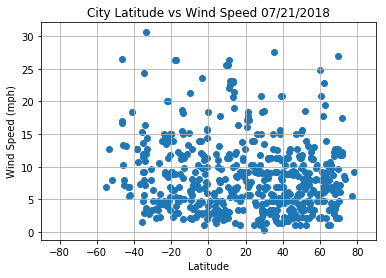

In [54]:
# Creating a scatter plot for city latitude vs wind speed (mph)
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"])
plt.title("City Latitude vs Wind Speed 07/21/2018")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90, 90)
plt.grid()
plt.savefig("lat_wind.png")